In [1]:
import math
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import PIL as pil
#import ipyplot
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta
from scipy.integrate import quad
from scipy.optimize import curve_fit
from IPython.display import display, HTML

# Equidistant experiment

## 5 Run validation

In [128]:
A = np.empty(5, dtype=object)
for i in range(5):
    file="Ex-2(1)/CKTC20240920_{0}.csv".format(i+1)
    A[i] = np.genfromtxt(file, delimiter=",")

In [129]:
B = np.zeros(A[0].shape)
for i in A:
    B += i
B = B/40

In [130]:
gr = B[1::2,1::2]
gb = B[::2,::2]
gb.max()
for i in range(gb.shape[0]):
    for j in range(gb.shape[1]):
        if gb[i,j] == 1832.8:  ### putting gb.max() here does not work
            print('[{0},{1}]'.format(i,j))
            peakline = i
            break
### Reverse indexing for the peak.
### Looking below at the graph, it is apparent that this point is likely not the true peak and only a spike in the data.
### TODO would be to maybe either throw this point out or take more samples perhaps.
### I'm thinking it could be valid to take the average of the surrounding points on each axis and compare those values to find a true peak.

np.float64(229.1)

<Figure size 640x480 with 0 Axes>

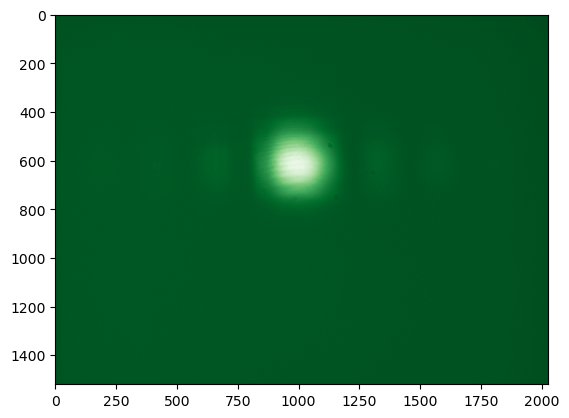

In [131]:
plt.figure()
plt.imshow(gb.max()-(gb[:,:-4]-gb[:,:-4].min()),cmap='Greens')
### Plotting inverse of graph, adjusted for zero.

<Figure size 640x480 with 0 Axes>

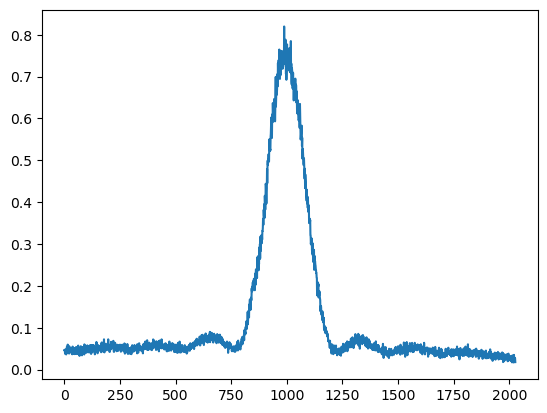

In [132]:
gbnorm = (gb[:,:-4]-gb[:,:-4].min())/gb.max()
plt.figure()
plt.plot(gbnorm[peakline,:])
plt.show()
### Graph adjusted for zero and normalized.

In [133]:
u = 1.55E-6 ### unit cell size as per https://www.arducam.com/sony/imx477/
np.sqrt((u*4056)**2+(u*3040)**2) ### given image size = 7.857 mm

np.float64(0.007856640391414132)

In [134]:
x = np.linspace(-u*4056/2,u*4056/2, gbnorm[peakline,:].size) ### Across calculated horizontal dimension

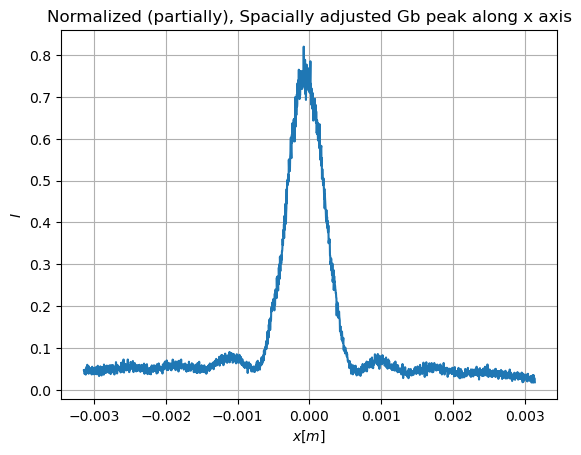

In [135]:
gbnorm = (gb[:,:-4]-gb[:,:-4].min())/gb.max()
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1, xlabel='$x [m]$', ylabel='$I$', title='Normalized (partially), Spacially adjusted Gb peak along x axis')
ax0.grid()
ax0.plot(x, gbnorm[peakline,:])

In [136]:
def I (x, k, a, b, c): ### will likely not work if x_n = 0
    s0 = a
    z = 0.2175
    r = -0.2175
    u = 8*10**-5
    return (s0**2/((x-c)**2+z**2))*((r-z)/np.sqrt((x-c)**2+(z-r)**2))**2*(np.sin((k*u*(x-c))/np.sqrt((x-c)**2+z**2))/((k*u*(x-c))/np.sqrt((x-c)**2+z**2)))**2+b

In [137]:
k0 = 2*np.pi/(523*10**(-9))
A = 1.4279         ### Here I create some values to get my s_0 factor to 0.23 and my floor to be at 0 offset
B = 0.054
popt, pcov = curve_fit(I, x, gbnorm[peakline,:]*A-B, p0 = [k0, 0.23, 0.01, 0.0002])

12013738.637054658

array([ 1.21429791e+07,  2.17490736e-01,  7.42420973e-03, -5.35730069e-05])

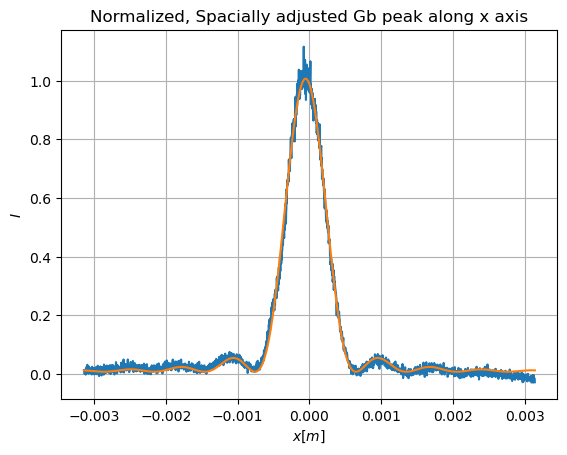

In [138]:
k0
popt
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1, xlabel='$x [m]$', ylabel='$I$', title='Normalized, Spacially adjusted Gb peak along x axis')
ax0.grid()
ax0.plot(x, gbnorm[peakline,:]*A-B)
ax0.plot(x, I(x,*popt))

In [139]:
print('Laser given wavelength = {0}nm\nLaser calculated wavelength = {1:.3f}nm'.format(2*np.pi/k0*10**9,2*np.pi/popt[0]*10**9))

Laser given wavelength = 523.0nm
Laser calculated wavelength = 517.434nm


This figure is much closer to the expected result. I figure that if we could get more presice dimentional measurments that we could dial this figure in even further. I am not sure as to how much the laser being equidistant to the slit form the screen went into this finding as aposed to just having known the distance better.

## 40 run

In [142]:
A = np.empty(5, dtype=object)
for i in range(5):
    file="Ex-3/CKTC20240920_{0}.csv".format(i+1)
    A[i] = np.genfromtxt(file, delimiter=",")

In [143]:
B = np.zeros(A[0].shape)
for i in A:
    B += i
B = B/40

In [144]:
gr = B[1::2,1::2]
gb = B[::2,::2]
gb.max()
for i in range(gb.shape[0]):
    for j in range(gb.shape[1]):
        if gb[i,j] == 1832.8:  ### putting gb.max() here does not work
            print('[{0},{1}]'.format(i,j))
            peakline = i
            break
### Reverse indexing for the peak.
### Looking below at the graph, it is apparent that this point is likely not the true peak and only a spike in the data.
### TODO would be to maybe either throw this point out or take more samples perhaps.
### I'm thinking it could be valid to take the average of the surrounding points on each axis and compare those values to find a true peak.

np.float64(223.1)

<Figure size 640x480 with 0 Axes>

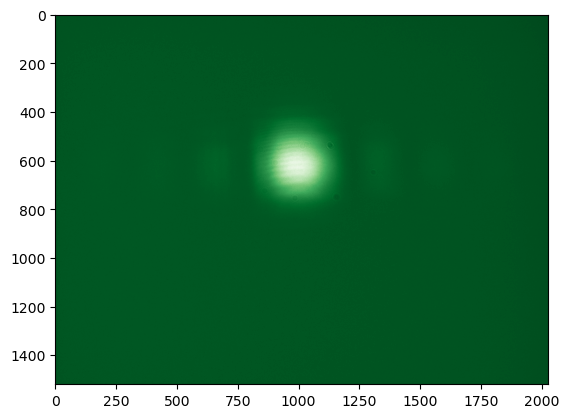

In [145]:
plt.figure()
plt.imshow(gb.max()-(gb[:,:-4]-gb[:,:-4].min()),cmap='Greens')
### Plotting inverse of graph, adjusted for zero.

<Figure size 640x480 with 0 Axes>

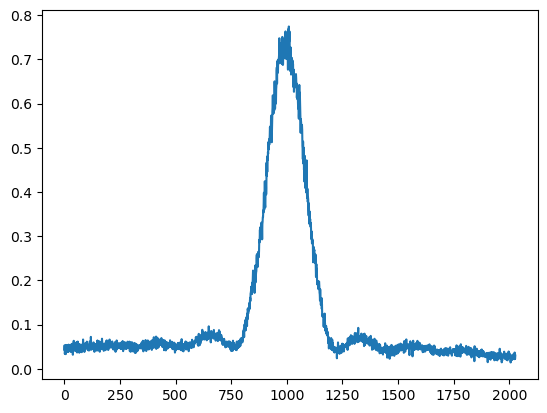

In [189]:
gbnorm = (gb[:,:-4]-gb[:,:-4].min())/gb.max()
plt.figure()
plt.plot(gbnorm[peakline,:])
plt.show()
### Graph adjusted for zero and normalized.

In [147]:
u = 1.55E-6 ### unit cell size as per https://www.arducam.com/sony/imx477/
np.sqrt((u*4056)**2+(u*3040)**2) ### given image size = 7.857 mm

np.float64(0.007856640391414132)

In [148]:
x = np.linspace(-u*4056/2,u*4056/2, gbnorm[peakline,:].size) ### Across calculated horizontal dimension

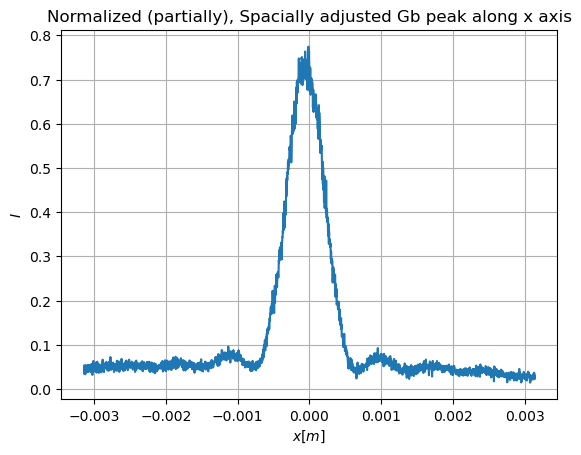

In [149]:
gbnorm = (gb[:,:-4]-gb[:,:-4].min())/gb.max()
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1, xlabel='$x [m]$', ylabel='$I$', title='Normalized (partially), Spacially adjusted Gb peak along x axis')
ax0.grid()
ax0.plot(x, gbnorm[peakline,:])

In [150]:
def I (x, k, a, b, c): ### will likely not work if x_n = 0
    s0 = a
    z = 0.2175
    r = -0.2175
    u = 8*10**-5
    return (s0**2/((x-c)**2+z**2))*((r-z)/np.sqrt((x-c)**2+(z-r)**2))**2*(np.sin((k*u*(x-c))/np.sqrt((x-c)**2+z**2))/((k*u*(x-c))/np.sqrt((x-c)**2+z**2)))**2+b

In [181]:
k0 = 2*np.pi/(523*10**(-9))
A = 1.46885         ### Here I create some values to get my s_0 factor to 0.23 and my floor to be at 0 offset
B = 0.0624225
popt, pcov = curve_fit(I, x, gbnorm[peakline,:]*A-B, p0 = [k0, 0.23, 0.01, 0.0002])

12013738.637054658

array([ 1.20348713e+07,  2.17500205e-01,  4.03633673e-07, -5.44859563e-05])

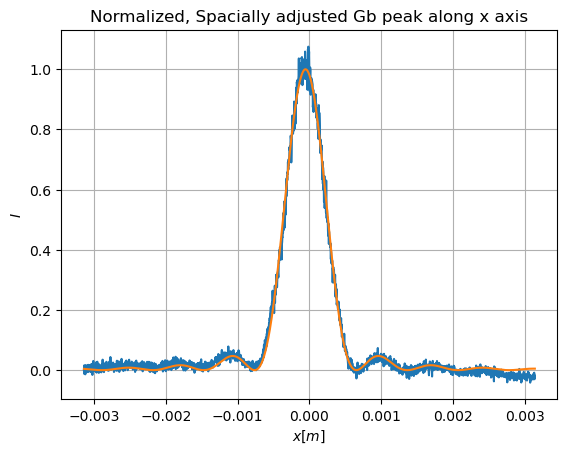

In [183]:
k0
popt
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1, xlabel='$x [m]$', ylabel='$I$', title='Normalized, Spacially adjusted Gb peak along x axis')
ax0.grid()
ax0.plot(x, gbnorm[peakline,:]*A-B)
ax0.plot(x, I(x,*popt))

In [184]:
print('Laser given wavelength = {0}nm\nLaser calculated wavelength = {1:.3f}nm'.format(2*np.pi/k0*10**9,2*np.pi/popt[0]*10**9))

Laser given wavelength = 523.0nm
Laser calculated wavelength = 522.082nm


The calculated value is much closer to the expected value with 40 runs averaged. 